In [91]:
from tensorflow import keras
# 지도 학습(다중 분류)
# x : 입력 데이터 (외부 자극 신호) <-- 패션 아이템 사진
# y : 출력 데이터 (0: 구두, 1: 하히힐, 2: 원피스 ...9)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [92]:
print(x_train.shape, y_train.shape) # 학습데이터셋
print(x_test.shape, y_test.shape) # 시험데이터셋

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


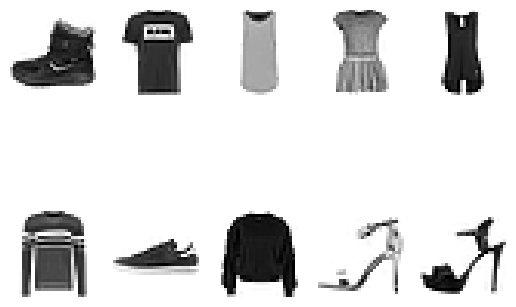

In [93]:
import matplotlib.pyplot as plt

# cmap -> color map
plt.figure()
for idx in range(10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(x_train[idx], cmap='gray_r') # image show
    plt.axis('off')

plt.show()

In [94]:
print(y_train[0:10])

[9 0 0 3 0 2 7 2 5 5]


In [95]:
import numpy as np

print(np.unique(y_train, return_counts=True)) # unique = y_train 데이터에 한번씩만

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [96]:
import tensorflow as tf

In [97]:
x_train_scaled = x_train / 255.0

In [98]:
print(x_train_scaled.shape)

(60000, 28, 28)


In [99]:
x_train_scaled = x_train_scaled.reshape(60000, 28 * 28)
print(x_train_scaled.shape)

(60000, 784)


In [119]:
happy = keras.layers.Dense(10, activation='softmax',input_shape=(28*28,)) # 밀집층 (Dense Layer)

In [120]:
model = keras.Sequential(happy)

In [121]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
# 모델컴파일
# 지도 학습(다중 분류)
# 문제(x) + 정답(y)
# y_prediction(예측)
# 오차(오류, error) = 정답(y) - y_prediction(예측)
model.compile(loss='sparse_categorical_crossentropy', # 손실, 오류(error)
             optimizer='adam',
             metrics='accuracy')

In [123]:
# 모델 학습
# fit <- 딱 들어맞는
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5973 - accuracy: 0.7975
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4608 - accuracy: 0.8437
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4352 - accuracy: 0.8508
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4218 - accuracy: 0.8558
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4144 - accuracy: 0.8562


In [124]:
# 평가 

x_test_scaled = x_test / 255.0 # 정규회
x_test_scaled = x_test_scaled.reshape(10000, 28 * 28) # 2D -> 1D 모양 변경

output = model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.8359


In [129]:
print(type(output))
print(output)
# print(f'테스트 데이터의 손실: {output[0]}')
print('테스트 데이터의 정확도: %.2f' % (output[0] * 100))

<class 'list'>
[0.474148690700531, 0.8359000086784363]
테스트 데이터의 정확도: 47.41
